In [1]:
#NYPD Arrest Data (Year to Date) Project 3

# NYPD 2023 Arrest Data - Elissa Selmore 

Is it true that certain communities are policed at higher rates than others? This is a complex question that requires careful analysis of data. To be able to provide an answer to this problematic question, we should look at relevant NYPD arrest data for 2023. This dataset shows a breakdown of arrests by age, sex, race, borough, precinct, and offense category. In this analysis the follow questions will be addressed:
*Which populations and boroughs have the highest arrest rates?
*What criminal offense are perpetrators are most often arrested for?
*Which gender is arrested most frequently?
*What age group is arrested most frequently and for what types of crimes?

We will also attempt to identify and address bias in the dataset, the root of the bias, whether or not the bias can be eliminated from future data collection. 

In [2]:
#Imported dataset by saving document to C drive intially.Script executed successfully. 
#Then output stopped working so I uploaded the dataset via Python. Still not getting any output on code. 
#Have attempted to troubleshoot a number of times and cannot find a solution.
import pandas as pd

df = pd.read_csv('NYPD_Arrest_Data__Year_to_Date__20231225.csv')    

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import matplotlib as mpl

import seaborn as sns

# Initial Review of Dataset

In [4]:
df.shape

(170095, 19)

In [5]:
#No output - is dataset too large????
#df.mean()

In [6]:
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,261209118,01/01/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,77,0,45-64,F,BLACK,999335,186085,40.677426,-73.945615,POINT (-73.945615 40.677426)
1,262984267,02/03/2023,515,"CONTROLLED SUBSTANCE,SALE 3",117.0,DANGEROUS DRUGS,PL 2203901,F,K,73,0,25-44,M,BLACK,1009318,178259,40.655923,-73.909650,POINT (-73.90965 40.655923)
2,263664549,02/15/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,62,0,25-44,M,WHITE,982272,158771,40.602468,-74.007120,POINT (-74.00712 40.602468)
3,261345231,01/04/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,32,0,25-44,M,BLACK,999899,238684,40.821797,-73.943457,POINT (-73.943457 40.821797)
4,263536618,02/13/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 12005WX,F,K,71,0,25-44,M,BLACK,1001437,183080,40.669175,-73.938042,POINT (-73.938042 40.669175)


In [7]:
df.tail()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
170090,270955727,07/07/2023,397,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601002,F,B,52,0,25-44,M,BLACK,1017273,255924,40.869067,-73.880600,POINT (-73.8806 40.869067)
170091,273117887,08/18/2023,681,"CHILD, ENDANGERING WELFARE",233.0,SEX CRIMES,PL 2601001,M,B,47,0,25-44,F,BLACK,1026480,262584,40.887314,-73.847272,POINT (-73.8472717577564 40.8873136344706)
170092,274301006,09/13/2023,969,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL051101A,M,S,122,0,25-44,M,WHITE HISPANIC,951857,161569,40.610087,-74.116666,POINT (-74.11666648991874 40.6100867091453)
170093,269912233,06/15/2023,490,"STOLEN PROPERTY 3,POSSESSION",232.0,POSSESSION OF STOLEN PROPERTY,PL 1654000,M,K,62,0,25-44,M,BLACK,983469,157947,40.600204,-74.002812,POINT (-74.00281242 40.60020423)
170094,272045762,07/28/2023,729,"FORGERY,ETC.,UNCLASSIFIED-FELO",113.0,FORGERY,PL 1702500,F,K,84,0,18-24,M,BLACK,988491,195163,40.702353,-73.984704,POINT (-73.98470449707197 40.70235306254946)


In [8]:
df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')

In [9]:
#not relevant infon - does not make sense for dataset. Would be useful for crime average etc.
df.describe()

,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,1.700950e+05,170095.000000,170082.000000,170095.000000,170095.000000,1.700950e+05,170095.000000,170095.000000,170095.000000
mean,2.683705e+08,425.242200,249.766342,63.423569,0.945918,1.005863e+06,208326.176925,40.738196,-73.921525
std,4.027782e+06,275.312255,148.500439,34.596068,7.683909,2.152952e+04,29737.941320,0.128134,0.195134
min,2.611809e+08,2.000000,101.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,-74.253187
25%,2.649555e+08,114.000000,113.000000,40.000000,0.000000,9.913600e+05,186065.000000,40.677251,-73.974365
50%,2.685036e+08,397.000000,236.000000,62.000000,0.000000,1.005511e+06,206851.000000,40.734434,-73.923234
75%,2.718261e+08,705.000000,344.000000,101.000000,0.000000,1.017933e+06,236175.000000,40.814867,-73.878333
max,2.752350e+08,997.000000,995.000000,123.000000,97.000000,1.067185e+06,271819.000000,40.912714,0.000000


In [10]:
# I want to issolate some of the columns to better analysize the dataset.By doing this my goal is to determine what measure 
#to evaulate for this project. 

In [11]:
#Precinct No. 14,75,44,40,and 103 have the hightest number of arrests 
#These precincts account for 26,667 total arrests or 15.67% 
#Precinct 14 -Manhattan
#Precinct 75 -Brooklyn
#Precinct 44 -Bronx
#Precinct 40 -Bronx
#Precinct 103 -Queens
#What group of people reside in these precincts? 
df.groupby(['ARREST_PRECINCT'])['ARREST_KEY'].count().sort_values(ascending=False)

ARREST_PRECINCT
14     5817
75     5469
44     5407
40     5392
103    4582
       ... 
100     873
123     773
17      769
111     659
22       68
Name: ARREST_KEY, Length: 77, dtype: int64

Text(0, 0.5, ' Arrest Frequency')

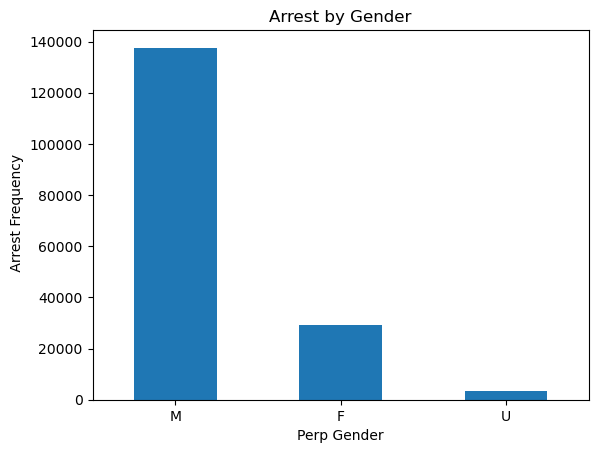

In [12]:
#Number of arrests based on Perp's sex
#Men account 80.8 % 
#Women account for 17% 
#Unidentified account for 2% 

df.groupby(['PERP_SEX'])['ARREST_KEY'].count().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=0)
plt.title('Arrest by Gender')
plt.xlabel("Perp Gender")
plt.ylabel(" Arrest Frequency")

In [13]:
#Most common arrest offense is "Third degree assult & related offenses" and accounts for 14.8% of the total arrests. 
#Third degree assult may consist of Physical Injury (intent, reckless, criminal negligence; weapon) 
df.groupby(['OFNS_DESC'])['ARREST_KEY'].count().sort_values(ascending=False).head(20)


OFNS_DESC
ASSAULT 3 & RELATED OFFENSES      25200
PETIT LARCENY                     18025
FELONY ASSAULT                    16030
DANGEROUS DRUGS                   11526
MISCELLANEOUS PENAL LAW           11132
VEHICLE AND TRAFFIC LAWS           9442
CRIMINAL MISCHIEF & RELATED OF     8333
ROBBERY                            8169
GRAND LARCENY                      7901
DANGEROUS WEAPONS                  7245
OFFENSES AGAINST PUBLIC ADMINI     5148
BURGLARY                           4753
OTHER OFFENSES RELATED TO THEF     4123
SEX CRIMES                         3901
OFFENSES INVOLVING FRAUD           3846
OFF. AGNST PUB ORD SENSBLTY &      3044
POSSESSION OF STOLEN PROPERTY      2738
FORGERY                            2591
INTOXICATED & IMPAIRED DRIVING     1953
OTHER TRAFFIC INFRACTION           1615
Name: ARREST_KEY, dtype: int64

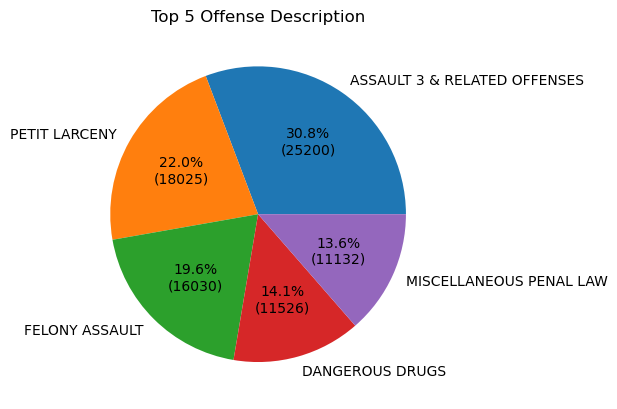

In [14]:
#Percentage values differ from above line due to entire dataset being included. Below chart only accounts for top 5 offensives.

values=[25200, 18025, 16030, 11526, 11132  ]
labels=['ASSAULT 3 & RELATED OFFENSES', 'PETIT LARCENY', 'FELONY ASSAULT', 'DANGEROUS DRUGS', 'MISCELLANEOUS PENAL LAW']

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"

plt.pie(values, labels=labels, autopct=lambda pct: func(pct, values))

plt.title('Top 5 Offense Description')

plt.show()

In [15]:
#Borough by number of arrests
#Brooklyn 27.5%
#Bronx 23.4%
#Manhattan 23.3%
#Queens 21.3%
#Staten Island 4.3%
df.groupby(['ARREST_BORO'])['ARREST_KEY'].count().sort_values(ascending=False)

ARREST_BORO
K    46825
B    39957
M    39652
Q    36246
S     7415
Name: ARREST_KEY, dtype: int64

Text(0, 0.5, 'Arrest Frequency')

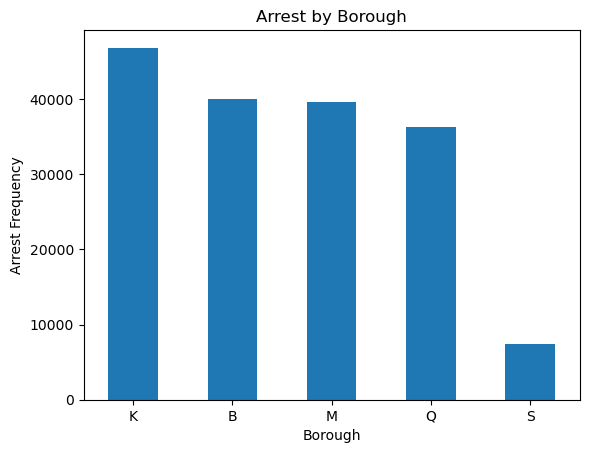

In [16]:
#Bar graph showing arrests by borough. Brooklyn has the highest number of arrests.
df.groupby(['ARREST_BORO'])['ARREST_KEY'].count().sort_values(ascending=False).plot(kind='bar') 
plt.xticks(rotation=0) #for lettering
plt.title('Arrest by Borough')
plt.xlabel("Borough")
plt.ylabel("Arrest Frequency")

In [17]:
#Arrests by race 
#M&W definition (Race - one of the groups that humans are divided into based on physical traits regarded as common among people of shared ancestry) 
#Black males 
#Why is the hispanic group being separated? How is race identified - by the offender or the arresting officer?
df.groupby(['PERP_RACE'])['ARREST_KEY'].count().sort_values(ascending=False)

PERP_RACE
BLACK                             82041
WHITE HISPANIC                    43081
BLACK HISPANIC                    16501
WHITE                             16373
ASIAN / PACIFIC ISLANDER           9066
UNKNOWN                            2481
AMERICAN INDIAN/ALASKAN NATIVE      552
Name: ARREST_KEY, dtype: int64

Text(0, 0.5, 'Perp Race')

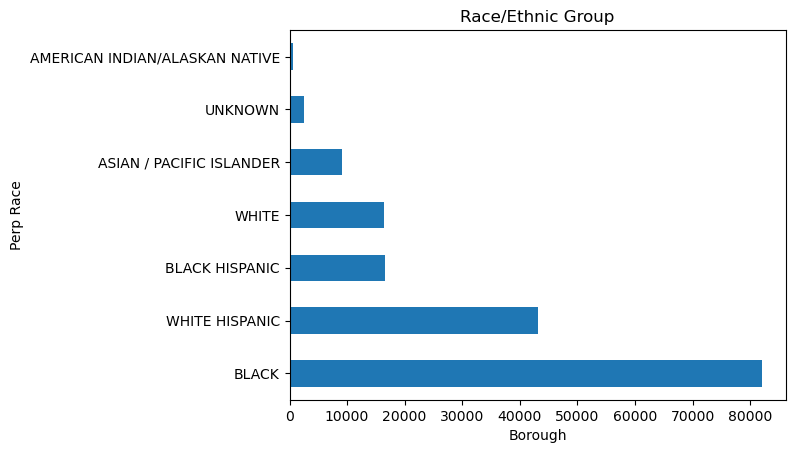

In [18]:
df.groupby(['PERP_RACE'])['ARREST_KEY'].count().sort_values(ascending=False).plot.barh()
plt.title('Race/Ethnic Group')
plt.xlabel("Borough")
plt.ylabel("Perp Race")


Text(0, 0.5, 'Arrest Frequency')

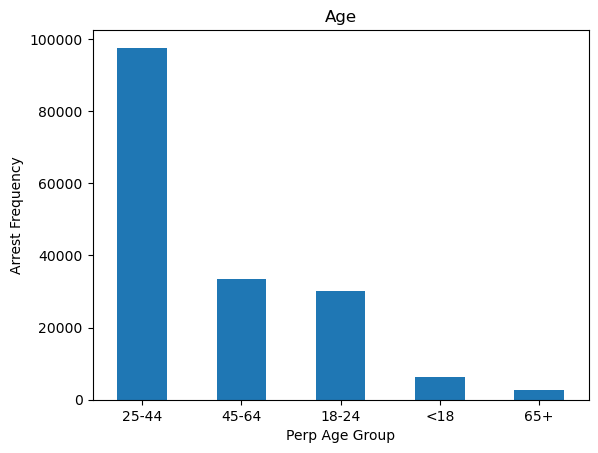

In [19]:
#The age group 25-44 accounts for 57.3% of the total arrests in NYC
df.groupby(['AGE_GROUP'])['ARREST_KEY'].count().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=0)
plt.title('Age')
plt.xlabel("Perp Age Group")
plt.ylabel("Arrest Frequency")

Text(0, 0.5, 'Arrest Frequency')

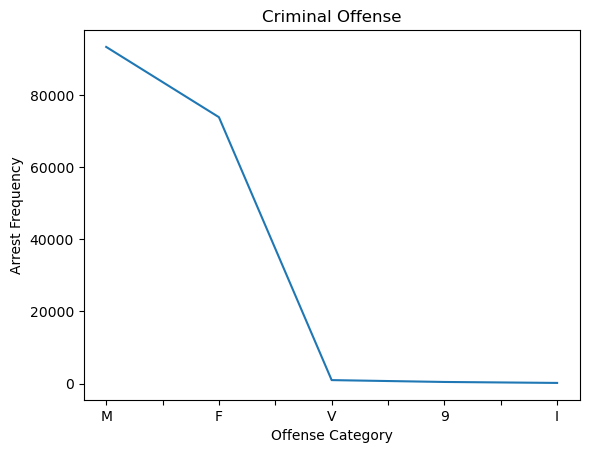

In [20]:
#Arrests by Law Category (criminal offense)
#Misdemeanors total 54.8%
#Felonies total 43.4%
#Violations tatal 0.5%
#Criminal offenses are classified into three categories - Felonies, Misdemeanors, and Infractions or Violations
#Which borough has the most misdemeanor and felony arrests?

df.groupby(['LAW_CAT_CD'])['ARREST_KEY'].count().sort_values(ascending=False).plot.line()
plt.title('Criminal Offense')
plt.xlabel("Offense Category")
plt.ylabel("Arrest Frequency")

In [21]:
#Subset of df dataset (all precincts)
df2=df[['ARREST_BORO', 'ARREST_PRECINCT','ARREST_DATE','PERP_RACE','PERP_SEX','AGE_GROUP','LAW_CAT_CD','PD_DESC']]
df2

,ARREST_BORO,ARREST_PRECINCT,ARREST_DATE,PERP_RACE,PERP_SEX,AGE_GROUP,LAW_CAT_CD,PD_DESC
0,K,77,01/01/2023,BLACK,F,45-64,F,"ASSAULT 2,1,UNCLASSIFIED"
1,K,73,02/03/2023,BLACK,M,25-44,F,"CONTROLLED SUBSTANCE,SALE 3"
2,K,62,02/15/2023,WHITE,M,25-44,F,STRANGULATION 1ST
3,M,32,01/04/2023,BLACK,M,25-44,F,STRANGULATION 1ST
4,K,71,02/13/2023,BLACK,M,25-44,F,"ASSAULT 2,1,UNCLASSIFIED"
...,...,...,...,...,...,...,...,...
170090,B,52,07/07/2023,BLACK,M,25-44,F,"ROBBERY,OPEN AREA UNCLASSIFIED"
170091,B,47,08/18/2023,BLACK,F,25-44,M,"CHILD, ENDANGERING WELFARE"
170092,S,122,09/13/2023,WHITE HISPANIC,M,25-44,M,"TRAFFIC,UNCLASSIFIED INFRACTIO"
170093,K,62,06/15/2023,BLACK,M,25-44,M,"STOLEN PROPERTY 3,POSSESSION"


In [22]:
#Measure 'Princinct 14' against dataset
#It was at this point my code stopped executing
#Was able to obtain assistance from Kim. I attempted to run a line of code that was causing the dataframe to freeze due to the inability to compute.

In [23]:
#Attempt to only view Precinct 14 data - not successful
df2[df2['ARREST_PRECINCT']'14']


SyntaxError: invalid syntax. Perhaps you forgot a comma? (2801633288.py, line 2)

In [24]:
#loc method was not successful 
df2.loc[df2['ARREST_PRECINCT'] =="14"]
df2

,ARREST_BORO,ARREST_PRECINCT,ARREST_DATE,PERP_RACE,PERP_SEX,AGE_GROUP,LAW_CAT_CD,PD_DESC
0,K,77,01/01/2023,BLACK,F,45-64,F,"ASSAULT 2,1,UNCLASSIFIED"
1,K,73,02/03/2023,BLACK,M,25-44,F,"CONTROLLED SUBSTANCE,SALE 3"
2,K,62,02/15/2023,WHITE,M,25-44,F,STRANGULATION 1ST
3,M,32,01/04/2023,BLACK,M,25-44,F,STRANGULATION 1ST
4,K,71,02/13/2023,BLACK,M,25-44,F,"ASSAULT 2,1,UNCLASSIFIED"
...,...,...,...,...,...,...,...,...
170090,B,52,07/07/2023,BLACK,M,25-44,F,"ROBBERY,OPEN AREA UNCLASSIFIED"
170091,B,47,08/18/2023,BLACK,F,25-44,M,"CHILD, ENDANGERING WELFARE"
170092,S,122,09/13/2023,WHITE HISPANIC,M,25-44,M,"TRAFFIC,UNCLASSIFIED INFRACTIO"
170093,K,62,06/15/2023,BLACK,M,25-44,M,"STOLEN PROPERTY 3,POSSESSION"


In [25]:
#Code did not execute
df2.query('ARREST_PRECINCT =="14"')
df2

,ARREST_BORO,ARREST_PRECINCT,ARREST_DATE,PERP_RACE,PERP_SEX,AGE_GROUP,LAW_CAT_CD,PD_DESC
0,K,77,01/01/2023,BLACK,F,45-64,F,"ASSAULT 2,1,UNCLASSIFIED"
1,K,73,02/03/2023,BLACK,M,25-44,F,"CONTROLLED SUBSTANCE,SALE 3"
2,K,62,02/15/2023,WHITE,M,25-44,F,STRANGULATION 1ST
3,M,32,01/04/2023,BLACK,M,25-44,F,STRANGULATION 1ST
4,K,71,02/13/2023,BLACK,M,25-44,F,"ASSAULT 2,1,UNCLASSIFIED"
...,...,...,...,...,...,...,...,...
170090,B,52,07/07/2023,BLACK,M,25-44,F,"ROBBERY,OPEN AREA UNCLASSIFIED"
170091,B,47,08/18/2023,BLACK,F,25-44,M,"CHILD, ENDANGERING WELFARE"
170092,S,122,09/13/2023,WHITE HISPANIC,M,25-44,M,"TRAFFIC,UNCLASSIFIED INFRACTIO"
170093,K,62,06/15/2023,BLACK,M,25-44,M,"STOLEN PROPERTY 3,POSSESSION"


# Measure of Comparison

In [27]:
#Examining Brooklyn's data
df2.loc[df['ARREST_BORO'] =='K'].head(20)

,ARREST_BORO,ARREST_PRECINCT,ARREST_DATE,PERP_RACE,PERP_SEX,AGE_GROUP,LAW_CAT_CD,PD_DESC
0,K,77,01/01/2023,BLACK,F,45-64,F,"ASSAULT 2,1,UNCLASSIFIED"
1,K,73,02/03/2023,BLACK,M,25-44,F,"CONTROLLED SUBSTANCE,SALE 3"
2,K,62,02/15/2023,WHITE,M,25-44,F,STRANGULATION 1ST
4,K,71,02/13/2023,BLACK,M,25-44,F,"ASSAULT 2,1,UNCLASSIFIED"
7,K,67,03/04/2023,BLACK,M,<18,F,RAPE 3
10,K,61,01/30/2023,WHITE,M,65+,F,"ARSON 2,3,4"
13,K,75,04/04/2023,BLACK,M,25-44,F,STRANGULATION 1ST
16,K,75,04/25/2023,WHITE,M,45-64,F,STRANGULATION 1ST
17,K,84,03/16/2023,BLACK,M,25-44,F,RAPE 1
19,K,77,03/21/2023,ASIAN / PACIFIC ISLANDER,M,45-64,F,RAPE 3


In [31]:
#Focus Measure will only review Brooklyn's 75th Precinct data against dataset
df2.loc[df['ARREST_PRECINCT'] ==75].head(20)

,ARREST_BORO,ARREST_PRECINCT,ARREST_DATE,PERP_RACE,PERP_SEX,AGE_GROUP,LAW_CAT_CD,PD_DESC
13,K,75,04/04/2023,BLACK,M,25-44,F,STRANGULATION 1ST
16,K,75,04/25/2023,WHITE,M,45-64,F,STRANGULATION 1ST
20,K,75,02/13/2023,WHITE,M,25-44,F,RAPE 1
54,K,75,08/02/2023,BLACK,M,25-44,F,STRANGULATION 1ST
97,K,75,08/02/2023,BLACK,M,25-44,F,STRANGULATION 1ST
100,K,75,01/04/2023,BLACK,M,25-44,F,WEAPONS POSSESSION 3
147,K,75,02/28/2023,BLACK,F,45-64,M,"CONTROLLED SUBSTANCE, POSSESSI"
155,K,75,03/16/2023,WHITE HISPANIC,U,45-64,M,AGGRAVATED HARASSMENT 2
214,K,75,01/09/2023,BLACK,M,18-24,M,"TRAFFIC,UNCLASSIFIED MISDEMEAN"
276,K,75,05/31/2023,BLACK HISPANIC,M,25-44,M,"THEFT,RELATED OFFENSES,UNCLASS"


In [32]:
#Number of arrests at 75th Precinct East New York & Cypress Hill Neighborhoods
df2.loc[df['ARREST_PRECINCT'] ==75].count()

ARREST_BORO        5469
ARREST_PRECINCT    5469
ARREST_DATE        5469
PERP_RACE          5469
PERP_SEX           5469
AGE_GROUP          5469
LAW_CAT_CD         5454
PD_DESC            5469
dtype: int64

In [28]:
#Attempting to combine the borough and precinct into one line of code 
#No output and no code error
df2.loc[((df['ARREST_BORO'] =='K') & (df['ARREST_PRECINCT']=='75'))]

,ARREST_BORO,ARREST_PRECINCT,ARREST_DATE,PERP_RACE,PERP_SEX,AGE_GROUP,LAW_CAT_CD,PD_DESC


In [29]:
#Brooklyn arrest data and criminal category (Felonies) but includes all BK precincts
df2.loc[((df['ARREST_BORO'] =='K') & (df['LAW_CAT_CD']=='F'))]

,ARREST_BORO,ARREST_PRECINCT,ARREST_DATE,PERP_RACE,PERP_SEX,AGE_GROUP,LAW_CAT_CD,PD_DESC
0,K,77,01/01/2023,BLACK,F,45-64,F,"ASSAULT 2,1,UNCLASSIFIED"
1,K,73,02/03/2023,BLACK,M,25-44,F,"CONTROLLED SUBSTANCE,SALE 3"
2,K,62,02/15/2023,WHITE,M,25-44,F,STRANGULATION 1ST
4,K,71,02/13/2023,BLACK,M,25-44,F,"ASSAULT 2,1,UNCLASSIFIED"
7,K,67,03/04/2023,BLACK,M,<18,F,RAPE 3
...,...,...,...,...,...,...,...,...
170041,K,61,09/15/2023,WHITE,M,45-64,F,RECKLESS ENDANGERMENT 1
170075,K,84,06/09/2023,BLACK,M,25-44,F,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED"
170077,K,79,07/08/2023,BLACK HISPANIC,M,25-44,F,"ASSAULT 2,1,UNCLASSIFIED"
170078,K,77,08/02/2023,BLACK,M,<18,F,"ROBBERY,OPEN AREA UNCLASSIFIED"


In [50]:
df2.loc[(((df['ARREST_BORO'] =='K')& ['ARREST_PRECINCT'] =='75') & (df['LAW_CAT_CD']=='F'))]

ARREST_BORO        0
ARREST_PRECINCT    0
ARREST_DATE        0
PERP_RACE          0
PERP_SEX           0
AGE_GROUP          0
LAW_CAT_CD         0
PD_DESC            0
dtype: int64

In [ ]:
df3=df2.loc[df['ARREST_PRECINCT'] ==75] & (df['LAW_CAT_CD']).count()


In [ ]:
#Visualizations or code that did not work or was unclear 

#sns.jointplot(x='ARREST_KEY', y='OFNS_DESC', data=df)
#df.gro
   
    
#Scatter
   # x = np.random.randn(2000)
   #y = np.random.randn(2000)
   # plt.scatter(x, y)
   # plt.title("Arrest by Borough")
   # plt.xlabel("ARREST_BORO")
   # plt.ylabel("ARREST_KEY")
   # plt.show()

#df1=df[['JURISDICTION_CODE','AGE_GROUP']]
#df1

# Final Analysis

The systemic practice of over policing in black and Hispanic neighborhoods has been a longstanding issue across the United States of American for decades. This method where police agencies maintain a larger presence in poor communities and tend to respond more aggressively to minor offensives. This is a problem across all regions of the county and the largest city, New York City, is not exempt. According to the year-to-date NYPD Arrest Data there were 170,095 arrests made in the city from January 1, 2023, to November 30, 2023. Of the five boroughs, Brooklyn lead the list with 46,852 arrests (27.54 %) and it's 75th precinct, that serves the predominately black and Hispanic neighborhoods of East New York and Cypress Hills had the highest number of arrests in the borough at 5,469.

The data clearly shows the racial disparities in arrests by borough, offense, precinct, and age. Blacks were arrested at the highest rate in the dataset among all age groups at a whopping total of 82,041 or 48.2% arrest rate. The most common offense category was misdemeanors at 54.8% with Assault 3rd degree & related offenses taking the lead for arrest reason. The age group (25-44) accounted for more than half of the arrests at 57.3%.

Precinct 14, located in Manhattan, has the most arrests by precinct across the city at 5,817.

Questions not answered - Do the perpetrators identify their racial group or is that done by the arresting officer? Are there more police in the areas where the arrests numbers are higher?